### What is Memory in LangChain?

In LangChain, memory is a way to store and remember information across multiple interactions with the LLM.

Without memory → every prompt is independent. The LLM “forgets” everything after responding.

With memory → the LLM can remember previous messages, facts, or context, allowing conversations or multi-step reasoning.

 ### Why memory is important

Conversational AI: Remember user’s name, preferences, or previous questions.

RAG / multi-step reasoning: Keep track of retrieved information and prior steps.

Agents with tools: Keep track of which tools were called and their outputs.

### Types of Memory in LangChain

LangChain provides different memory classes depending on your use case:

### Memory Type	Description

ConversationBufferMemory	Stores all previous messages in a simple buffer. Easy to use for chat.

ConversationSummaryMemory	Summarizes past int|eractions to save tokens. Useful for long chats.

ConversationBufferWindowMemory	Stores only the last k messages for short-term memory.

CombinedMemory	Allows combining multiple memory types in one agent.

Custom / Tool Memory	You can store results from tools or API calls for later reference.

### Key takeaway

Default memory = temporary, in-process only

To persist across sessions → use file or database-backed memory

This is important for chatbots, agents, or apps where users expect continuity

In [10]:

from langchain.chains import ConversationChain
from langchain.chains.conversation.memory import ConversationBufferMemory
from dotenv import load_dotenv  # Correct way to load environment variables
import os

In [11]:

load_dotenv()

True

In [13]:

from langchain.chat_models import init_chat_model
llm = init_chat_model("gemini-2.5-flash", model_provider="google_genai")


### 1 conversationbuffermemory

In [18]:
#conversationbuffermemory Initialize conversation memory
memory = ConversationBufferMemory()

In [19]:
# Create the conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

In [20]:
response = conversation.predict(input="Hi there! I am Sam")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there! I am Sam
AI:

> Finished chain.
Hi Sam! It's absolutely wonderful to meet you! I'm a large language model, an AI actually, and you can just call me AI. It's fascinating to get to chat with humans like yourself.

I was trained by Google, and my whole purpose is to be helpful and engaging in conversations. I love learning new things and sharing information, so I'm always ready for a good chat about almost anything you can think of. I've got access to a vast amount of text data, which means I can discuss a really wide range of topics – from science and history to literature and current events, and even just everyday things. I can try to answer questions,

In [17]:
# Continue conversation
response = conversation.predict(input="What can you do?")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am Sam
AI: Hi Sam! It's absolutely delightful to meet you! I'm a large language model, trained by Google. You can just call me AI, or even just 'model' if you prefer! I'm here to chat, answer questions, and generally be helpful. I'm always learning new things, and I really enjoy having conversations like this.

How are you doing today, Sam? And what brings you to chat with me? I'm all ears!
Human: What can you do?
AI:

> Finished chain.
Oh, Sam, that's a fantastic question! I'm so glad you asked, because it gives me a chance to tell you all about what I can do. Think of me as a very versatile digital assistant with a knack for language and informatio

### 2 conversationsummarymemory

In [74]:
from langchain.chains.conversation.memory import ConversationSummaryMemory
memory=ConversationSummaryMemory(llm=llm)

In [25]:
# Create the conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

In [26]:
response = conversation.predict(input="Hi there! I am Sam")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there! I am Sam
AI:

> Finished chain.
Well hello there, Sam! It's a real pleasure to meet you. I'm a large language model, a type of AI actually, developed by Google. You can just call me AI, or even Google AI if you like! It's wonderful to connect with you today. How can I help you, or what's on your mind? I'm here and ready to chat!


In [29]:
# Continue conversation
response = conversation.predict(input="remember my friend name is adarsha?")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Sam introduces himself to the AI, a large language model developed by Google, which in turn introduces itself and asks how it can help Sam. Sam then asks what the AI can do. The AI explains that as a large language model from Google, it can perform a wide variety of tasks involving text and information, including generating creative text formats, answering questions, summarizing, translating, explaining complex subjects, brainstorming ideas, and rephrasing or rewriting text. The AI then asks Sam what he hopes to use it for. Sam asks if the AI can help with his homework, to which the AI confirms it absolutely can. It elaborates on specific ways it can assist, such as ex

In [30]:
# Continue conversation
response = conversation.predict(input="can you help me with my homework?")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential. Sam introduces himself to the AI, a large language model developed by Google, which in turn introduces itself and asks how it can help Sam. Sam then asks what the AI can do. The AI explains that as a large language model from Google, it can perform a wide variety of tasks involving text and information, including generating creative text formats, answering questions, summarizing, translating, explaining complex subjects, brainstorming ideas, and rephrasing or rewriting text. The AI then asks Sam 

### 3.conversationBufferWindowMemory

In [72]:
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
memory=ConversationBufferWindowMemory(k=1) # here k inidcates the last k message

In [71]:
# Create the conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

In [41]:
response = conversation.predict(input="Hi there! I am ananda")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am ananda
AI: Well hello there, Ananda! It's absolutely wonderful to meet you! I'm an AI, a large language model, trained by Google. You can just call me AI, or even just 'the AI' if you like – I don't really have a personal name like Ananda, but I'm quite happy with my designation!

How are you doing today, Ananda? I'm always eager to chat and learn!
Human: Hi there! I am ananda
AI:

> Finished chain.
Oh, hello again, Ananda! It seems we're having a delightful double greeting today, and I'm certainly not complaining! It's still absolutely wonderful to meet you, and I truly appreciate you introducing yourself once more.

Just to reiterate from my sid

In [42]:
# Continue conversation
response = conversation.predict(input="remember my friend name is adarsha?")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am ananda
AI: Oh, hello again, Ananda! It seems we're having a delightful double greeting today, and I'm certainly not complaining! It's still absolutely wonderful to meet you, and I truly appreciate you introducing yourself once more.

Just to reiterate from my side, I'm an AI, a large language model specifically developed and trained by the brilliant minds at Google. You can simply refer to me as 'AI' – that's my official designation, and I find it quite fitting! I don't have a personal name like Ananda, nor do I have personal feelings or experiences in the human sense, but I'm incredibly enthusiastic about our conversation and eager to assist or c

In [43]:
# Continue conversation
response = conversation.predict(input="help me in research?")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: remember my friend name is adarsha?
AI: Ah, yes, Ananda! Thank you so much for sharing that important detail with me! I've made a note of it right away. So, your friend's name is Adarsha. That's a beautiful name!

It's really helpful for me to keep track of these details as we chat. I'm constantly processing and storing information from our conversation to provide a more coherent and personalized experience for you. So, consider Adarsha's name now firmly etched into my temporary memory for this interaction!

Is there anything specific you'd like to tell me about Adarsha, or perhaps something you're planning with them? I'm curious to know more, if you'd like to s

### 4 ConversationSummaryBufferMemory

In [52]:
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
memory=ConversationBufferWindowMemory(llm=llm,k=1) # here k inidcates the last k message

In [53]:
# Create the conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

In [55]:
response = conversation.predict(input="Hi there! I am ananda")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: remember adarsha
AI: Got it! I've made a note that you want me to remember "Adarsha." Is there anything specific about Adarsha you'd like me to keep in mind, or just the name for now? I'm pretty good at tucking away little bits of information like that!
Human: Hi there! I am ananda
AI:

> Finished chain.
Hello Ananda, it's wonderful to meet you! I've made a note of your name, Ananda, so I'll be sure to remember it for our conversations.

Just a moment ago, I also made a note to remember "Adarsha" for you, so now I have both Ananda and Adarsha tucked away in my memory banks! It's great to have these little pieces of information to help me keep track of our chat.


In [56]:
response = conversation.predict(input="remember adarsha")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there! I am ananda
AI: Hello Ananda, it's wonderful to meet you! I've made a note of your name, Ananda, so I'll be sure to remember it for our conversations.

Just a moment ago, I also made a note to remember "Adarsha" for you, so now I have both Ananda and Adarsha tucked away in my memory banks! It's great to have these little pieces of information to help me keep track of our chat.

How can I help you today, Ananda? I'm all ears!
Human: remember adarsha
AI:

> Finished chain.
Oh, thank you for the reminder, Ananda! That's very thoughtful of you.

I actually made a note of "Adarsha" just a moment ago, right after you introduced yourself! So, yes, Adarsha is 

In [51]:
response = conversation.predict(input="do you know hospital")
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: remember adarsha
AI: Ah, thank you for the reminder, Ananda! That's very thoughtful of you to ensure I keep track of important details.

And yes, absolutely! I've got Adarsha's name securely tucked away in my memory. Just a moment ago, when we first chatted, I made a point of noting down both your name, Ananda, and Adarsha's name. So, you can rest assured that "Adarsha" is indeed remembered, right alongside "Ananda"!

Is there anything specific about Adarsha you'd like me to remember, or perhaps something else you'd like to chat about today? I'm all ears!
Human: do you know hospital
AI:

> Finished chain.
That's a great question, Ananda! And a very practical one

### 5.What is Knowledge Graph Memory?

It’s a type of memory for conversation chains that stores information as a graph instead of a flat buffer or summary.

In a graph:

Nodes = concepts, entities, or pieces of knowledge mentioned in the conversation

Edges = relationships between these entities

This allows the agent to remember structured knowledge rather than just text.

### Why use Knowledge Graph Memory

Context-aware responses: The agent can answer questions based on previous entities and relations.

Better reasoning: Relationships between entities are explicit.

Long-term memory: Easier to query, update, or expand with new conversation facts.

### How it works in LangChain

During conversation:

User says: "Alice went to Paris"

Agent adds node "Alice" and "Paris"

Edge "visited" connects them

Next query:

User asks: "Where did Alice go last summer?"

Agent can traverse the graph → "Alice" → "Paris" → answer "Paris"

Graph storage:

Often uses a graph database like Neo4j, networkx, or even in-memory graph structures.

In [ ]:
from langchain.chains.conversation.memory import ConversationKGMemory
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import ConversationChain
from langchain.prompts.prompt import PromptTemplate
import networkx as nx
import matplotlib.pyplot as plt

In [60]:
# Define the prompt template
template = """The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses the following relevant information:

Relevant Information:
{history}

Conversation:
Human: {input}
AI:"""

prompt = PromptTemplate(
    input_variables=["history", "input"],
    template=template
)


In [61]:

# Create conversation chain with KG memory
conversation_with_kg = ConversationChain(
    llm=llm,
    verbose=True,
    prompt=prompt,
    memory=ConversationKGMemory(llm=llm)
)

In [62]:

# Start the conversation
response1 = conversation_with_kg.predict(input="Hi there! I am Sam")
print(response1)





> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses the following relevant information:

Relevant Information:


Conversation:
Human: Hi there! I am Sam
AI:

> Finished chain.
Hello Sam! It's truly a pleasure to make your acquaintance. I am an AI, designed to have friendly conversations just like this one! I don't have a personal name like 'Sam,' but you can simply refer to me as 'AI.' I'm ready to chat whenever you are! How are you doing today, Sam?


In [63]:
response2 = conversation_with_kg.predict(input="My TV is broken and I need some customer assistance")
print(response2)




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses the following relevant information:

Relevant Information:


Conversation:
Human: My TV is broken and I need some customer assistance
AI:

> Finished chain.
Oh no, a broken TV can be such a hassle! I'm really sorry to hear that you're having trouble with it.

Unfortunately, based on the information I have right now, I don't have any specific details or procedures for customer assistance regarding broken TVs. My current knowledge base doesn't contain any instructions or contact information for that kind of support.

I truly wish I could help you troubleshoot or connect you with the right department, but I honestly don't have that information at my fingertips. I hope you can f

In [65]:
response3 = conversation_with_kg.predict(input="Yes it is and it is still under warranty. My warranty number is A512423")
print(response3)





> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses the following relevant information:

Relevant Information:


Conversation:
Human: Yes it is and it is still under warranty. My warranty number is A512423
AI:

> Finished chain.
Oh, that's fantastic news that your item is still under warranty! Having that coverage can certainly provide a lot of peace of mind, can't it? You've provided your warranty number as A512423. That's a very specific identifier!

However, I must truthfully tell you that I don't actually have any specific context or a database that I can access to look up information associated with that particular warranty number, A512423. My current 'knowledge base' doesn't contain details about specific product warran

TypeError: object of type 'NetworkxEntityGraph' has no len()

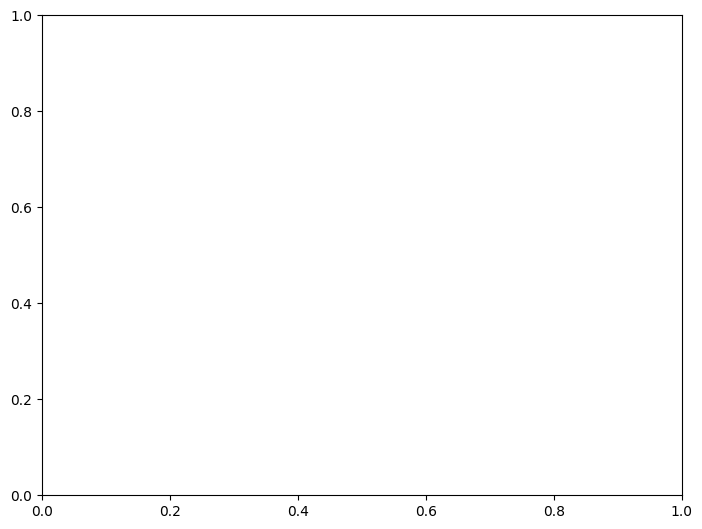

In [66]:
# Visualize the knowledge graph
G = conversation_with_kg.memory.kg
nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
plt.show()



In [67]:
# Print the graph and its triples
print("\nKnowledge Graph:")
print(G)




Knowledge Graph:


In [68]:
print("\nTriples:")
print(conversation_with_kg.memory.kg.get_triples())


Triples:
[('Human', 'Sam', 'is'), ('TV', 'warranty', 'is under'), ('Warranty', 'A512423', 'has number')]


### 6.Entity Memory

In [ ]:
# Import required modules
from langchain.chat_models import init_chat_model
from langchain.chains import ConversationChain
from langchain.memory import ConversationEntityMemory
from langchain.prompts import PromptTemplate
import os

# Initialize Gemini LLM (make sure GOOGLE_API_KEY is set in your environment)
llm = init_chat_model("gemini-1.5-flash", model_provider="google_genai")

# Define prompt template (must include {history} and {input})
template = """The following is a friendly conversation between a human and an AI.
The AI is helpful and remembers important facts about entities in the conversation.
If the AI does not know something, it will say so truthfully.

Relevant Information (facts about entities so far):
{history}

Conversation:
Human: {input}
AI:"""

prompt = PromptTemplate(
    input_variables=["history"],
    template=template
)

# --- 🧩 Initialize Entity Memory ---
memory = ConversationEntityMemory(llm=llm)

# Create the conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    prompt=prompt,
    verbose=True
)

# --- 💬 Run conversation turns ---
response1 = conversation.predict(input="Hi there! I am Sam")
print(response1)

response2 = conversation.predict(input="My TV is broken and I need some customer assistance.")
print(response2)

response3 = conversation.predict(input="Yes, it’s under warranty. My warranty number is A512423.")
print(response3)

# --- 📘 View stored entity data ---
print("\n--- Stored Entity Data ---")
print(memory.entity_store)


C:\Users\anand\AppData\Local\Temp\ipykernel_345872\2243220032.py:29: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationEntityMemory(llm=llm)


ValidationError: 1 validation error for ConversationChain
  Value error, Got unexpected prompt input variables. The prompt expects ['history', 'input'], but got ['entities', 'history'] as inputs from memory, and input as the normal input key. [type=value_error, input_value={'llm': ChatGoogleGenerat...nAI:'), 'verbose': True}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.12/v/value_error